# Day - 1

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
print(df.columns)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [ ]:
print(df.shape)

(13320, 9)


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df=df.dropna()
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
society,0
total_sqft,0
bath,0
balcony,0
price,0


In [ ]:
df.fillna(0)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [ ]:
# Check unique values in 'size'
print(df['size'].unique())

# Extract numeric values from the 'size' column (e.g., 2 BHK -> 2)
df['bhk'] = df['size'].str.split().str[0].astype(int)

# Remove outliers or clean data in the 'total_sqft' column
def convert_sqft_to_num(sqft):
    try:
        return float(sqft)
    except:
        # Handle ranges like '2100-2850' by averaging
        if '-' in sqft:
            values = sqft.split('-')
            return (float(values[0]) + float(values[1])) / 2
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

# Remove rows with invalid or null 'total_sqft'
df = df[df['total_sqft'].notnull()]

['2 BHK' '4 Bedroom' '3 BHK' '3 Bedroom' '1 RK' '4 BHK' '1 BHK' '5 BHK'
 '11 BHK' '5 Bedroom' '9 BHK' '2 Bedroom' '6 BHK' '7 BHK' '6 Bedroom']


In [ ]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

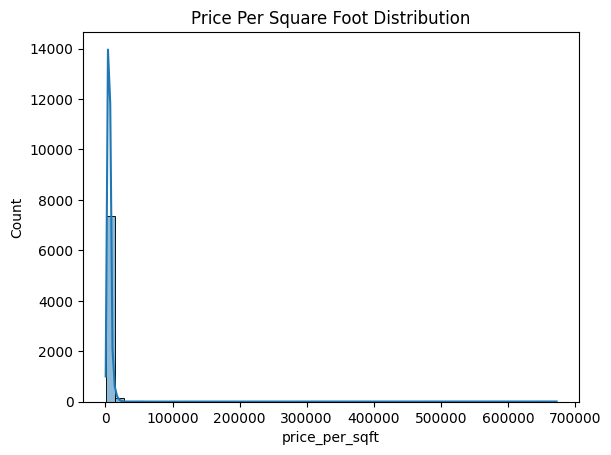

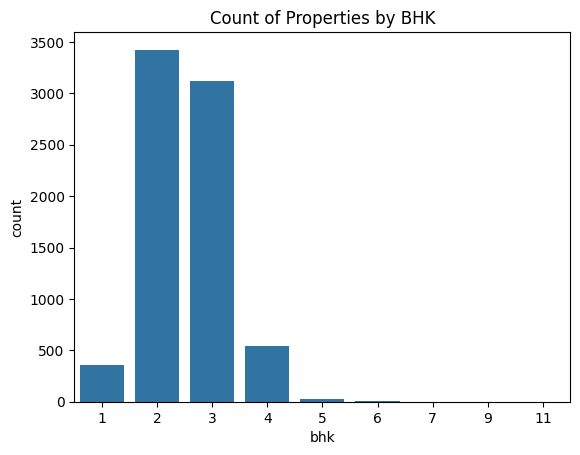

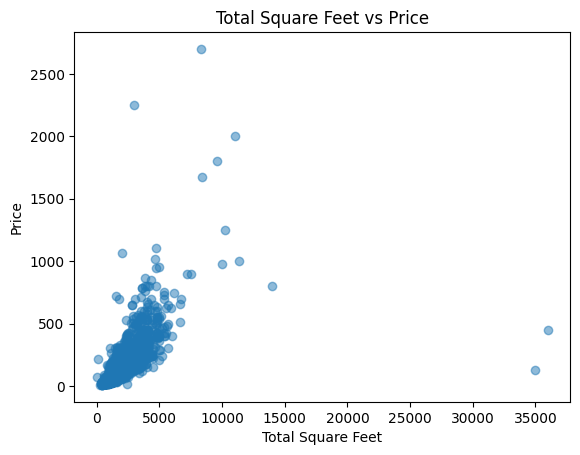

In [ ]:
# Distribution of price per square foot
sns.histplot(df['price_per_sqft'], bins=50, kde=True)
plt.title("Price Per Square Foot Distribution")
plt.show()

# Count of properties by BHK
sns.countplot(x='bhk', data=df)
plt.title("Count of Properties by BHK")
plt.show()

# Scatter plot for total_sqft vs price
plt.scatter(df['total_sqft'], df['price'], alpha=0.5)
plt.xlabel("Total Square Feet")
plt.ylabel("Price")
plt.title("Total Square Feet vs Price")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression # Import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Import necessary libraries
from sklearn.metrics import r2_score, mean_squared_error

# Predict on test set
y_pred = model.predict(X_test)

# Metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.4727065082107932
Mean Squared Error: 6660.622223942231


In [ ]:
# Example input: Total Square Feet = 2000, Bathrooms = 3, BHK = 3
new_data = np.array([[2000, 3, 3]])
predicted_price = model.predict(new_data)
print("Predicted Price:", predicted_price[0])

Predicted Price: 141.02174132596963


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
df.to_excel("output.xlsx",index= False)
print("Data has been saved to output.xlsx")

Data has been saved to output.xlsx


In [ ]:
def convert_rk_to_bhk(value):
    if isinstance(value, str):  # Check if the value is a string
        if 'RK' in value:
            # Extract the number from the string
            num = int(value.split()[0])  # Get the number part (e.g., '1' from '1 RK')
            # Treat as BHK format: 1 RK => 1 BHK, 2 RK => 1 BHK + Hall, etc.
            if num == 1:
                return '1 BHK'  # Example logic: Treat 1 RK as 1 BHK
            elif num == 2:
                return '1 BHK + Hall'  # Example logic: Treat 2 RK as 1 BHK + Hall
            else:
                return f'{num} BHK'  # For higher values, just assign 'X BHK'
    return value

# Apply the conversion function to the 'size' column (or the relevant column)
df['size'] = df['size'].apply(convert_rk_to_bhk)

# Save the updated DataFrame to Excel
df.to_excel("updated_bengaluru_house_prices.xlsx", index=False)
print("Updated dataset saved as 'updated_bengaluru_house_prices.xlsx'")

Updated dataset saved as 'updated_bengaluru_house_prices.xlsx'


# Day - 2

Regration

1.Simple linear Regration

y = mx + c

2 . Multiple linear regration

3 . Polynomial Regration

4 . Logistic Regration

REGRATION MODAL

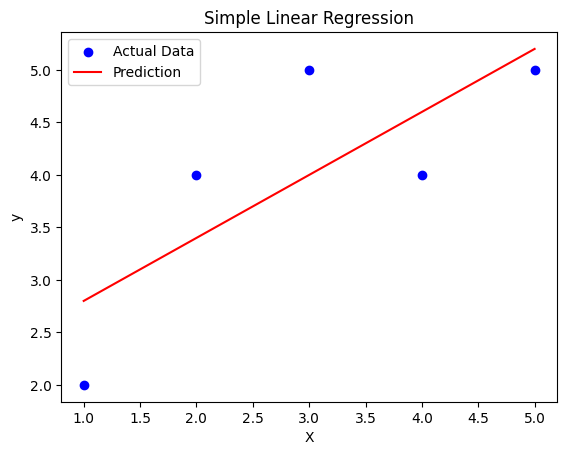

Slope (m): 0.6
Intercept (c): 2.2


In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5])

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict and plot
y_pred = model.predict(X)
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Prediction')
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Output coefficients
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)


In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X = np.array([[1, 4], [2, 6], [3, 9], [4, 5], [5, 3]])
y = np.array([2, 3, 5, 7, 8])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 0.32583721882047045
Coefficients: [ 1.54249292e+00 -1.41643059e-03]
Intercept: 0.4943342776203963


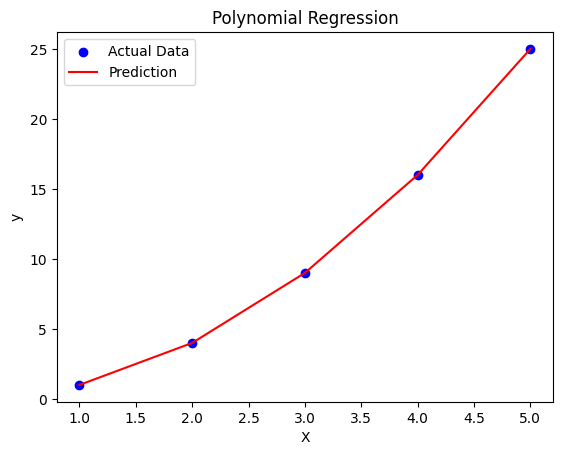

Coefficients: [ 0.00000000e+00 -8.77076189e-15  1.00000000e+00]
Intercept: 7.105427357601002e-15


In [ ]:
# Import libraries
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([1, 4, 9, 16, 25])  # Quadratic relationship

# Transform features to polynomial
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict and plot
y_pred = model.predict(X_poly)
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Prediction')
plt.title("Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Output coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Dataset shape: (20640, 8)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target variable:
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64

Model Evaluation:
Mean Squared Error (MSE): 0.5558915986952444
R^2 Score: 0.5757877060324508


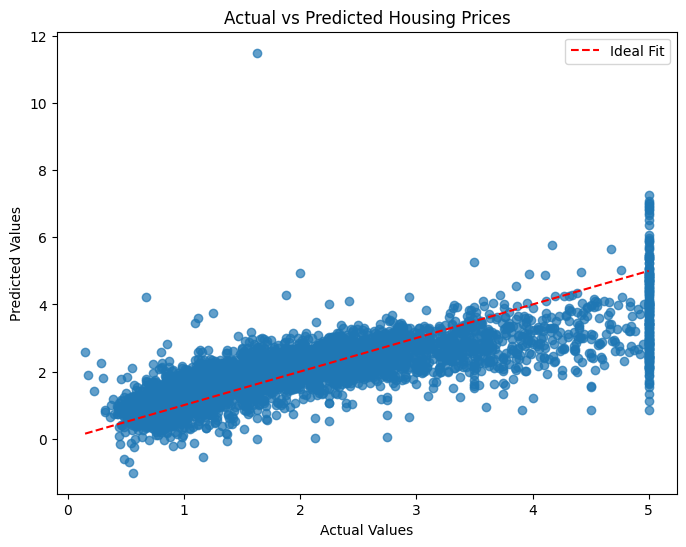

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the california Housing dataset
boston = fetch_california_housing()
X = pd.DataFrame(boston.data, columns=boston.feature_names)  # Features
y = pd.Series(boston.target)  # Target

# Display dataset information
print("Dataset shape:", X.shape)
print(X.head())
print("\nTarget variable:")
print(y.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Housing Prices")
plt.legend()
plt.show()


In [ ]:
df = pd.read_csv('/content/Bengaluru_House_Data.csv')

In [ ]:
print(df.columns)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [ ]:
# Create the 'bhk' column from the 'size' column
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else None)

# Check if the 'bhk' column is created successfully
print(df[['size', 'bhk']].head())


        size  bhk
0      2 BHK  2.0
1  4 Bedroom  4.0
2      3 BHK  3.0
3      3 BHK  3.0
4      2 BHK  2.0


In [ ]:
# Select relevant features and target
X = df[['total_sqft', 'bath', 'bhk']]
y = df['price']

# Ensure there are no missing values in the selected features
X.dropna(inplace=True)
y = y[X.index]


<ipython-input-30-3241503d5819>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [ ]:
def convert_sqft_to_num(x):
    try:
        # If the value is a range (e.g., "1000-1200"), take the average
        if '-' in x:
            nums = list(map(float, x.split('-')))
            return sum(nums) / 2
        # If the value can be converted to a float, return it
        return float(x)
    except:
        # For non-convertible values, return None
        return None


In [ ]:
# Clean and convert 'total_sqft' to numeric
df['total_sqft'] = df['total_sqft'].apply(lambda x: convert_sqft_to_num(x) if isinstance(x, str) else x)

# Drop rows where 'total_sqft' could not be converted
df = df[df['total_sqft'].notnull()]


Accuracy: 0.8163574403634987
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1340
           1       0.85      0.76      0.80      1301

    accuracy                           0.82      2641
   macro avg       0.82      0.82      0.82      2641
weighted avg       0.82      0.82      0.82      2641



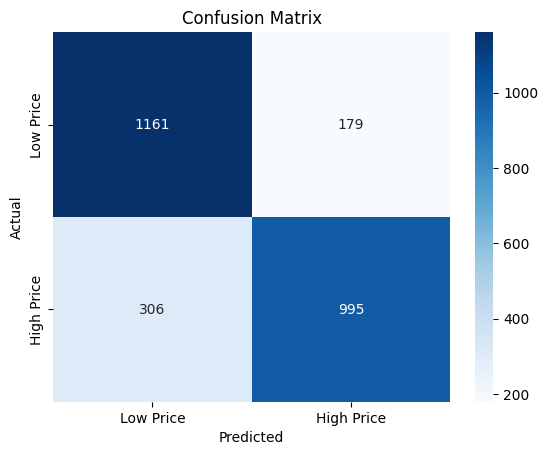

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Bengaluru_House_Data.csv')

# Define a function to clean 'total_sqft'
def convert_sqft_to_num(x):
    try:
        if '-' in x:  # Handle ranges (e.g., "1000-1200")
            nums = list(map(float, x.split('-')))
            return sum(nums) / 2
        return float(x)  # Convert single values to float
    except:
        return None  # Return None for non-convertible values

# Clean 'total_sqft'
df['total_sqft'] = df['total_sqft'].apply(lambda x: convert_sqft_to_num(x) if isinstance(x, str) else x)

# Drop rows with missing values in relevant columns
df.dropna(subset=['total_sqft', 'bath', 'size', 'price'], inplace=True)

# Create 'bhk' column from 'size'
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else None)

# Drop unnecessary columns
df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1, inplace=True)

# Create target variable: binary classification based on price median
df['price_category'] = (df['price'] > df['price'].median()).astype(int)

# Select features and target
X = df[['total_sqft', 'bath', 'bhk']]
y = df['price_category']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Price', 'High Price'], yticklabels=['Low Price', 'High Price'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


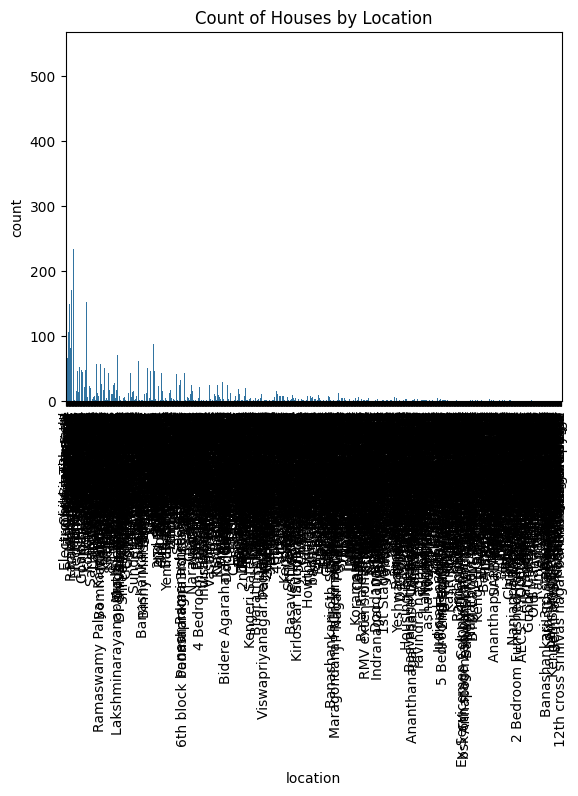

In [ ]:
sns.countplot(x='location', data=df)
plt.xticks(rotation=90)
plt.title('Count of Houses by Location')
plt.show()

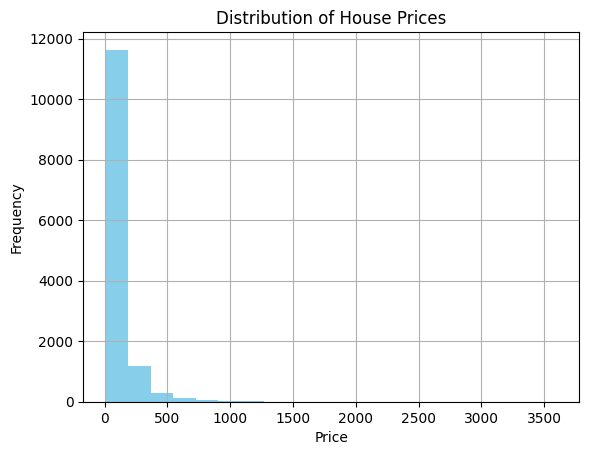

In [ ]:
df['price'].hist(bins=20, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


SVM Classifire

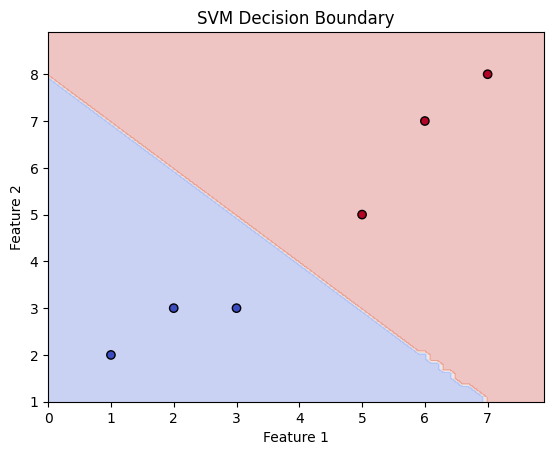

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate synthetic data
X = np.array([[1, 2], [2, 3], [3, 3], [5, 5], [6, 7], [7, 8]])
y = np.array([0, 0, 0, 1, 1, 1])  # Binary classification

# Train SVM classifier
model = SVC(kernel='linear')
model.fit(X, y)

# Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X, y, model)



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



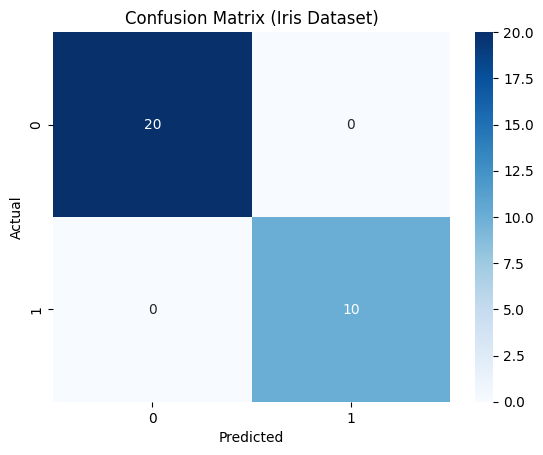

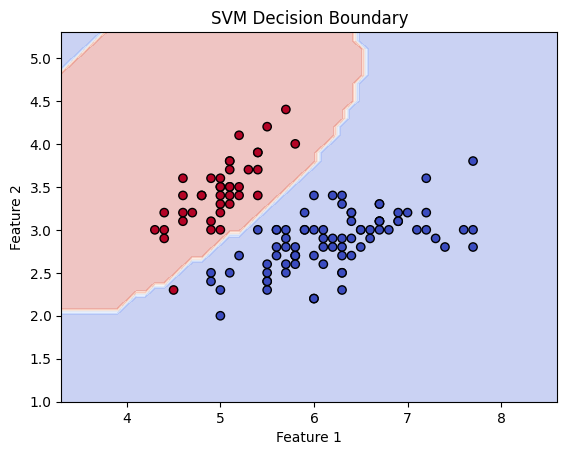

In [ ]:
# Import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only use first two features for visualization
y = iris.target

# Convert to binary classification (setosa vs non-setosa)
y = (y == 0).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
model = SVC(kernel='rbf', C=1, gamma=0.5)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Iris Dataset)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize decision boundary
plot_decision_boundary(X_train, y_train, model)


naive And Bayes


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



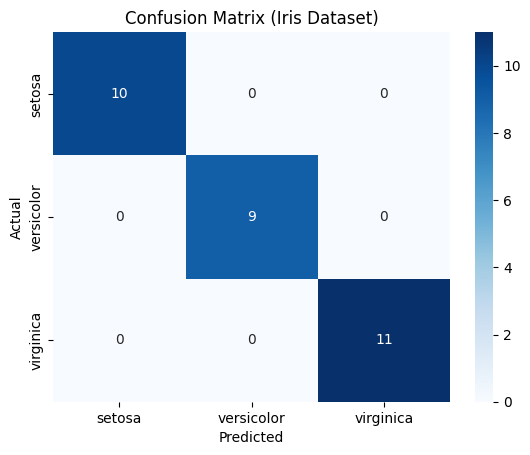

# Day - 3

[[-8.55503989  7.06461794]
 [-6.13753182 -6.58081701]
 [-6.32130028 -6.8041042 ]
 ...
 [ 3.69047995  4.60555175]
 [-7.48913939 -7.0670809 ]
 [-9.40049578  7.11430104]]


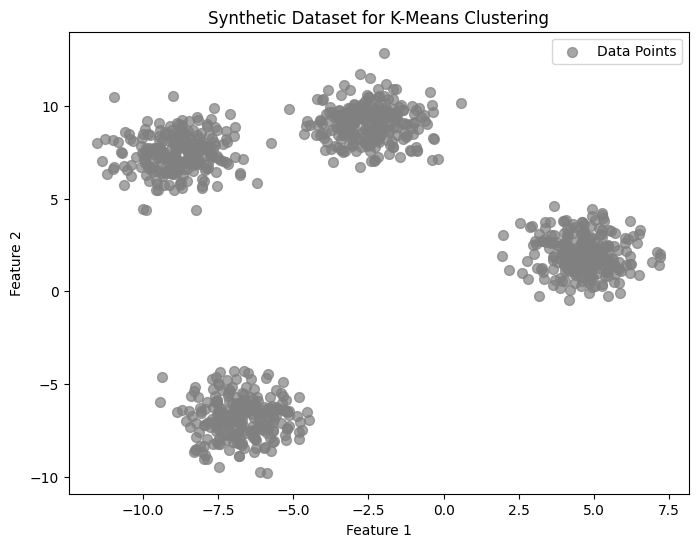

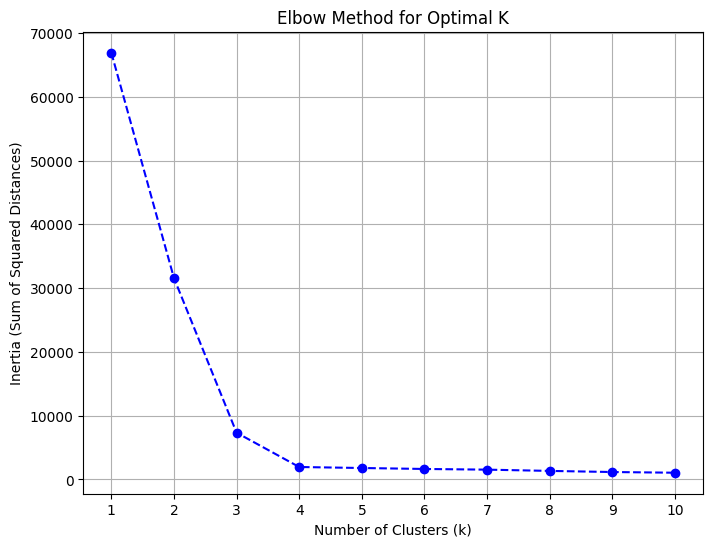

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset
np.random.seed(42)
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=42)
print(X)
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', alpha=0.7, label='Data Points')
plt.title("Synthetic Dataset for K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Elbow method to determine the optimal number of clusters
inertia = []  # Sum of squared distances for each k
k_values = range(1, 11)  # Number of clusters to test

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(k_values)
plt.grid()
plt.show()




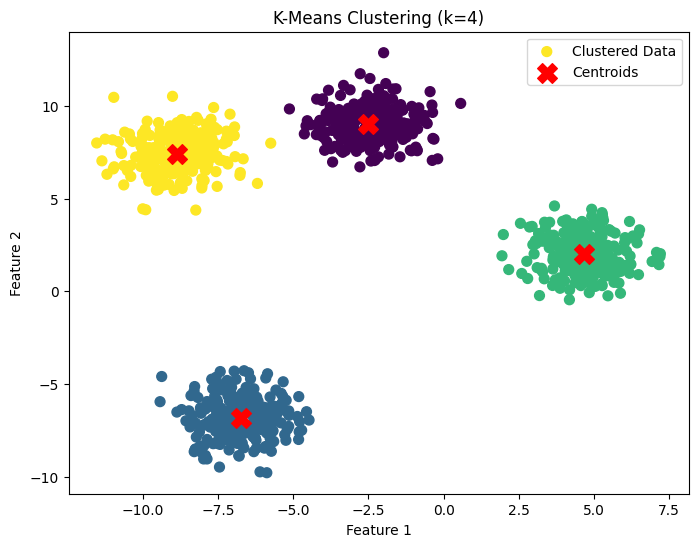

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, label='Clustered Data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering (k=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

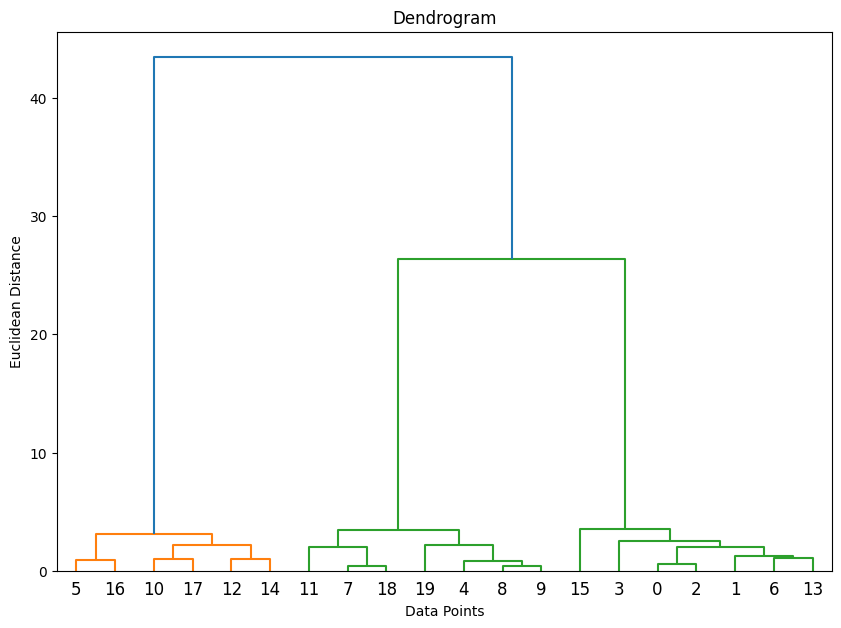

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate sample data
data, _ = make_blobs(n_samples=20, centers=3, random_state=42)

# Perform hierarchical clustering
linked = linkage(data, method='ward')  # Use Ward's method

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

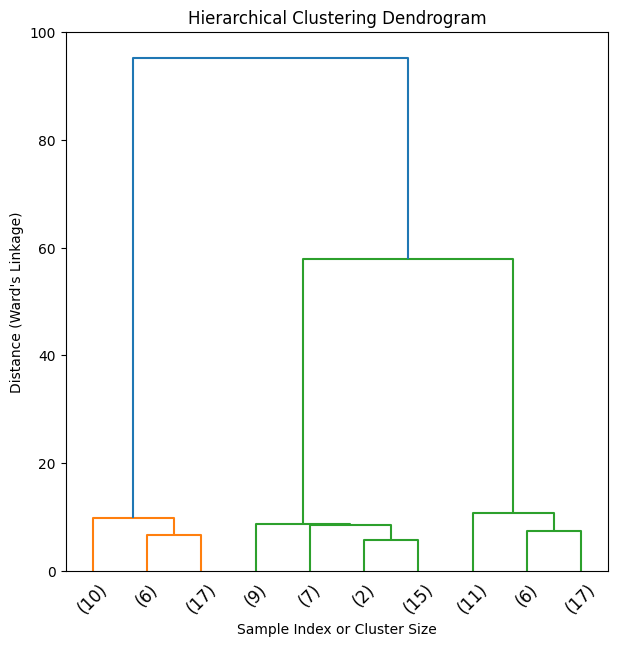

   jay


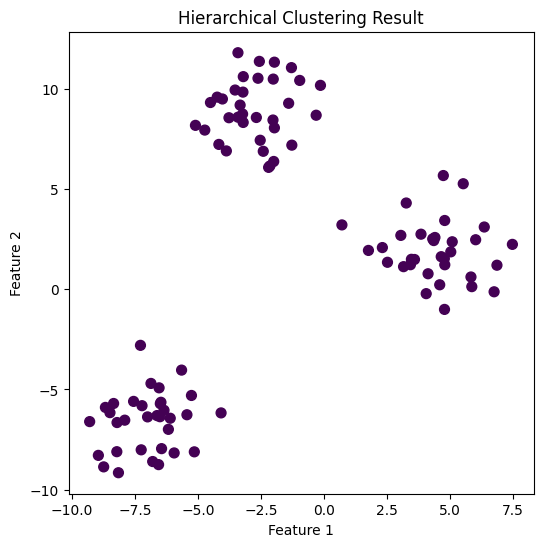

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.datasets import make_blobs

# Generate synthetic dataset
np.random.seed(42)
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.5, random_state=42)

# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(7, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=10, leaf_rotation=45, leaf_font_size=12)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance (Ward's Linkage)")
plt.show()

# Cut the dendrogram at a specific threshold distance to form clusters
threshold = 100
clusters = fcluster(linkage_matrix, t=threshold, criterion="distance")

# Plot the clustered data

print ("   jay")
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Hierarchical Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

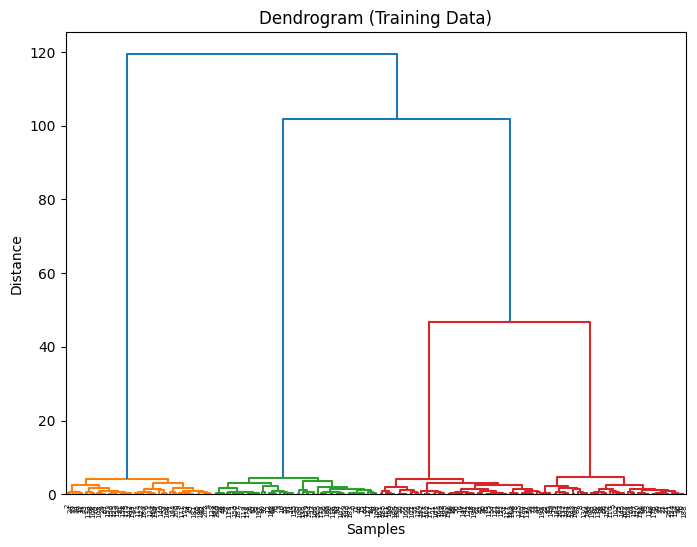

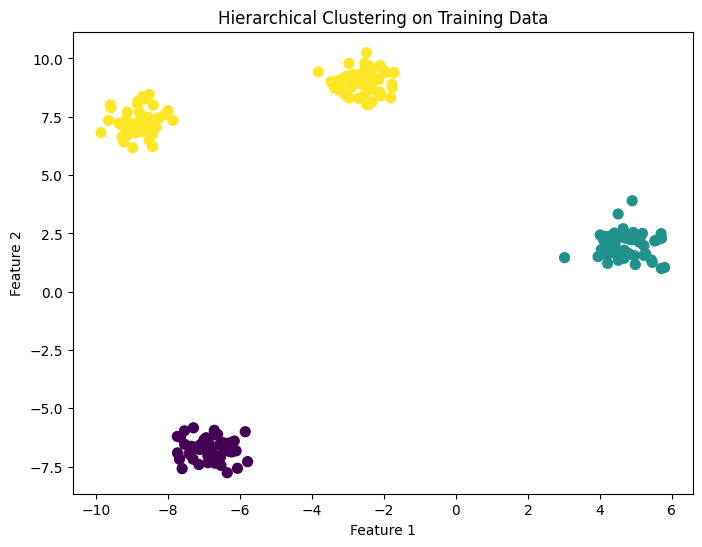

Silhouette Score for Training Data: 0.81


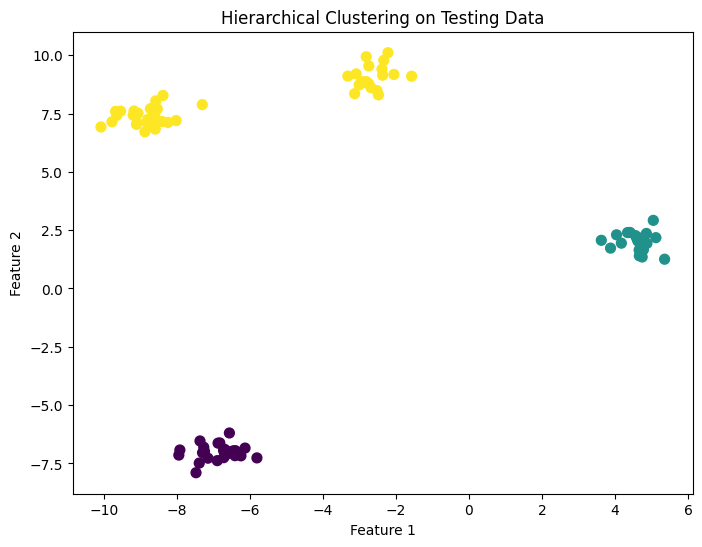

Silhouette Score for Testing Data: 0.81


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

# Generate synthetic dataset
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform hierarchical clustering on the training data
linkage_matrix = linkage(X_train, method="ward")
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram (Training Data)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Determine optimal number of clusters using dendrogram
optimal_threshold = linkage_matrix[-(4 - 1), 2]  # Assuming we know there are 4 clusters
train_labels = fcluster(linkage_matrix, t=optimal_threshold, criterion="distance")

# Plot clustering results for training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_labels, cmap="viridis", s=50)
plt.title("Hierarchical Clustering on Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluate training clusters with silhouette score
train_score = silhouette_score(X_train, train_labels)
print(f"Silhouette Score for Training Data: {train_score:.2f}")

# Predict clusters for testing data
linkage_matrix_test = linkage(X_test, method="ward")
test_labels = fcluster(linkage_matrix_test, t=optimal_threshold, criterion="distance")

# Plot clustering results for testing data
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_labels, cmap="viridis", s=50)
plt.title("Hierarchical Clustering on Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluate testing clusters with silhouette score
test_score = silhouette_score(X_test, test_labels)
print(f"Silhouette Score for Testing Data: {test_score:.2f}")

In [ ]:
make_blobs

<function sklearn.datasets._samples_generator.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)>

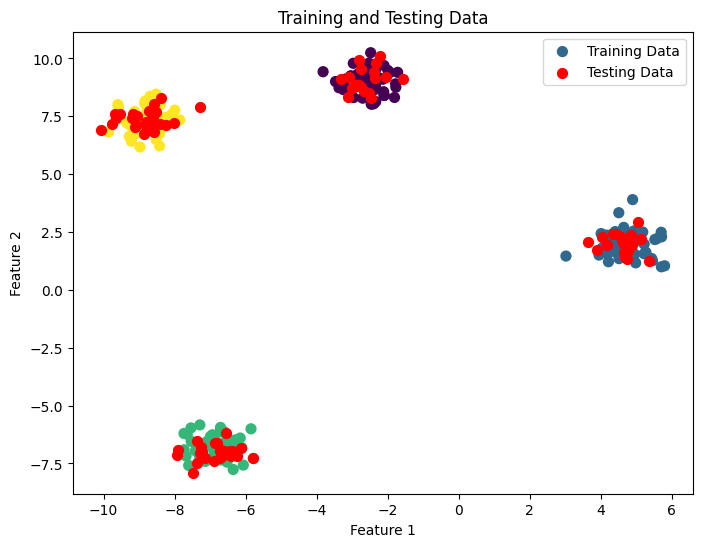

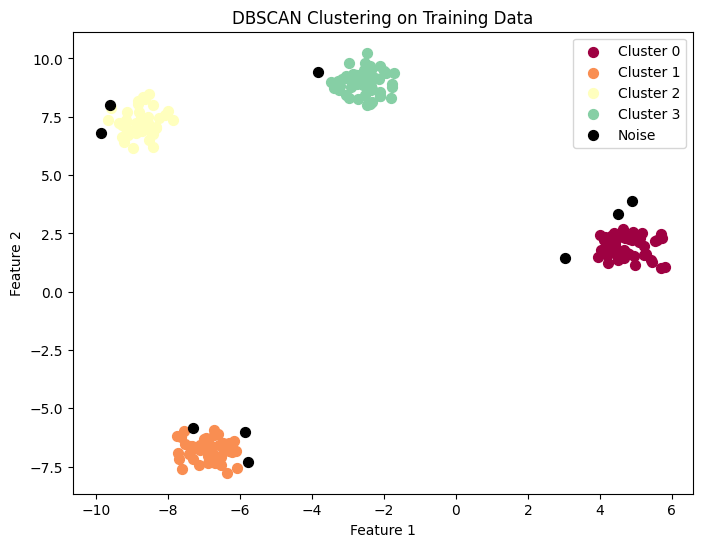

Silhouette Score for Training Data: 0.90


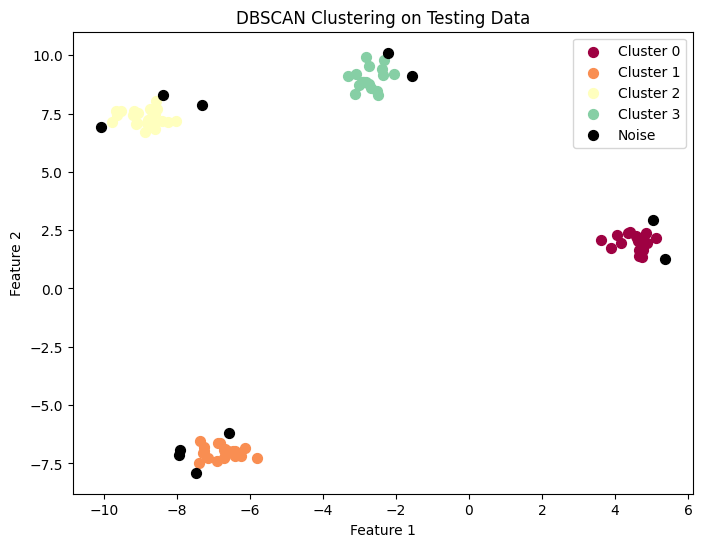

Silhouette Score for Testing Data: 0.92


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Generate synthetic dataset
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scatter plot of the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, label="Training Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', s=50, label="Testing Data")
plt.title("Training and Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Apply DBSCAN on the training data
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps: neighborhood size, min_samples: minimum points in a cluster
train_labels = dbscan.fit_predict(X_train)

# Plot DBSCAN clustering results for training data
plt.figure(figsize=(8, 6))
unique_labels = set(train_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (train_labels == k)
    xy = X_train[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, color=tuple(col), label=f"Cluster {k}" if k != -1 else "Noise")

plt.title("DBSCAN Clustering on Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Evaluate clustering performance using silhouette score on training data
core_samples_mask = (train_labels != -1)
if len(set(train_labels[core_samples_mask])) > 1:  # At least two clusters are required for silhouette score
    score = silhouette_score(X_train[core_samples_mask], train_labels[core_samples_mask])
    print(f"Silhouette Score for Training Data: {score:.2f}")
else:
    print("Silhouette score cannot be calculated with less than 2 clusters.")

# Predict clusters for the testing data
test_labels = dbscan.fit_predict(X_test)

# Plot DBSCAN clustering results for testing data
plt.figure(figsize=(8, 6))
unique_labels_test = set(test_labels)
colors_test = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_test))]

for k, col in zip(unique_labels_test, colors_test):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (test_labels == k)
    xy = X_test[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, color=tuple(col), label=f"Cluster {k}" if k != -1 else "Noise")

plt.title("DBSCAN Clustering on Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Evaluate clustering performance using silhouette score on testing data
core_samples_mask_test = (test_labels != -1)
if len(set(test_labels[core_samples_mask_test])) > 1:
    test_score = silhouette_score(X_test[core_samples_mask_test], test_labels[core_samples_mask_test])
    print(f"Silhouette Score for Testing Data: {test_score:.2f}")
else:
    print("Silhouette score cannot be calculated with less than 2 clusters.")


Principal Components:
 [[0.6778734  0.73517866]]
Explained Variance Ratio:
 [0.96318131]


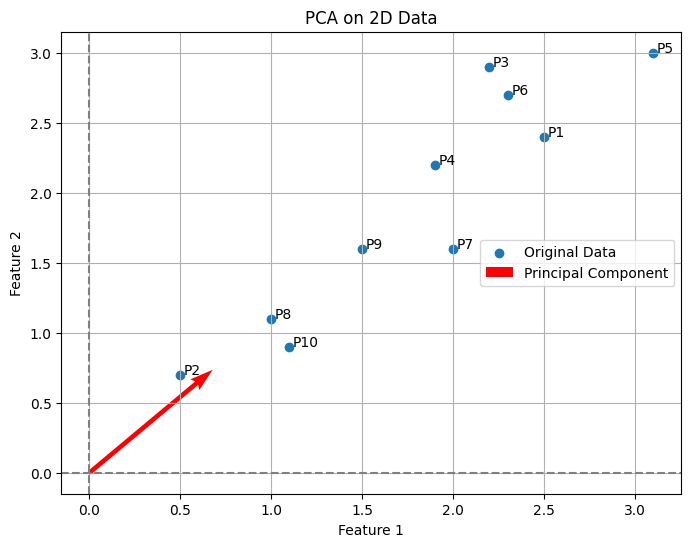

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the dataset
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2],
              [3.1, 3.0], [2.3, 2.7], [2.0, 1.6], [1.0, 1.1],
              [1.5, 1.6], [1.1, 0.9]])

# Step 1: Standardize the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Step 2: Apply PCA using sklearn
pca = PCA(n_components=1)  # Reduce to 1 principal component
X_pca = pca.fit_transform(X_centered)

# Print results
print("Principal Components:\n", pca.components_)
print("Explained Variance Ratio:\n", pca.explained_variance_ratio_)

# Plot original data and principal component
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="Original Data")
for i, (x, y) in enumerate(X):
    plt.text(x + 0.02, y, f"P{i+1}")
plt.quiver(0, 0, pca.components_[0, 0], pca.components_[0, 1], angles='xy', scale_units='xy', scale=1, color="r", label="Principal Component")
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.title("PCA on 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensions
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Determine the number of components to retain 80% variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
components_to_keep = np.argmax(explained_variance_ratio >= 0.8) + 1
print(f"Number of components to retain 80% variance: {components_to_keep}")

# Reduce the dataset to the selected components
pca_reduced = PCA(n_components=components_to_keep)
X_train_reduced = pca_reduced.fit_transform(X_train_scaled)
X_test_reduced = pca_reduced.transform(X_test_scaled)

# Train a classifier on the reduced data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_reduced, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

# Features before and after PCA
print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {components_to_keep}")


Number of components to retain 80% variance: 2
Accuracy on test data: 90.00%
Original number of features: 4
Reduced number of features: 2


Dataset (Binary Encoding):
    Bread  Butter   Eggs    Jam   Milk
0   True    True  False  False   True
1   True    True  False   True  False
2   True   False   True  False   True
3   True    True   True  False   True
4   True   False   True  False  False

Frequent Itemsets:
    support         itemsets
0      1.0          (Bread)
1      0.6         (Butter)
2      0.6           (Eggs)
3      0.6           (Milk)
4      0.6  (Butter, Bread)
5      0.6    (Eggs, Bread)
6      0.6    (Milk, Bread)

Association Rules:
   antecedents consequents  antecedent support  consequent support  support  \
0    (Butter)     (Bread)                 0.6                 1.0      0.6   
1     (Bread)    (Butter)                 1.0                 0.6      0.6   
2      (Eggs)     (Bread)                 0.6                 1.0      0.6   
3     (Bread)      (Eggs)                 1.0                 0.6      0.6   
4      (Milk)     (Bread)                 0.6                 1.0      0.6   
5     (Bre

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


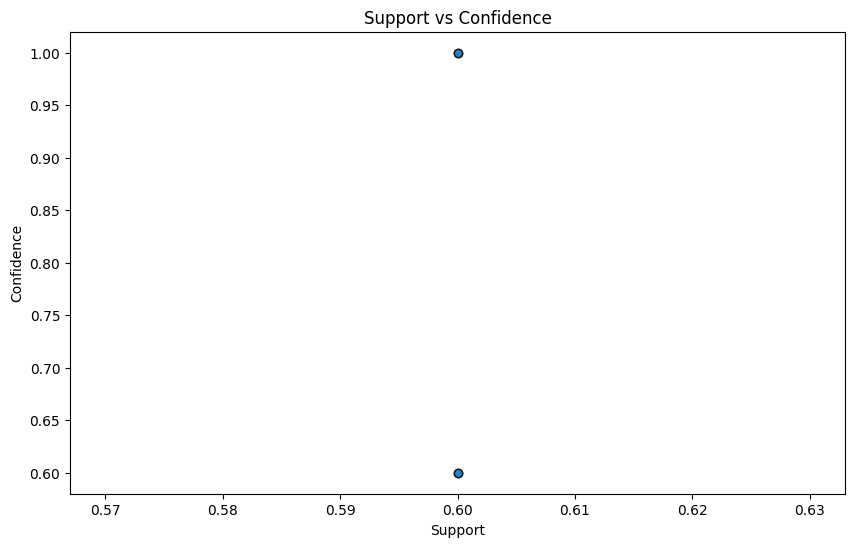

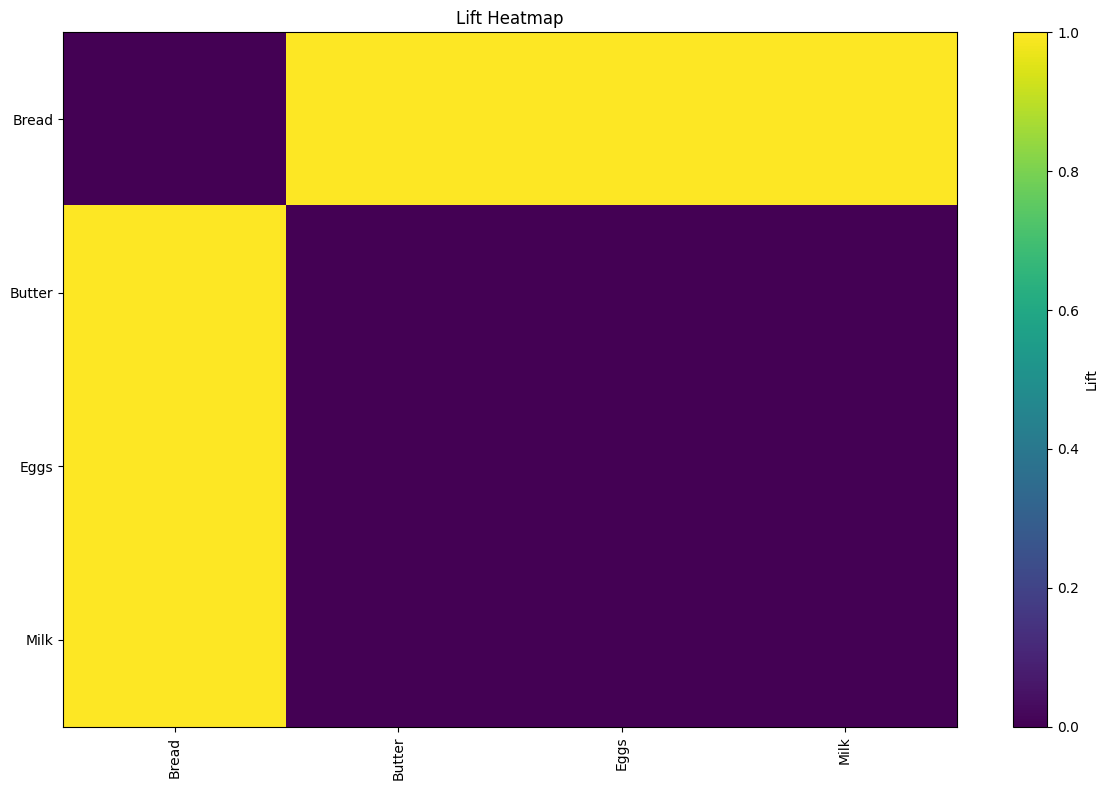

<Figure size 1000x600 with 0 Axes>

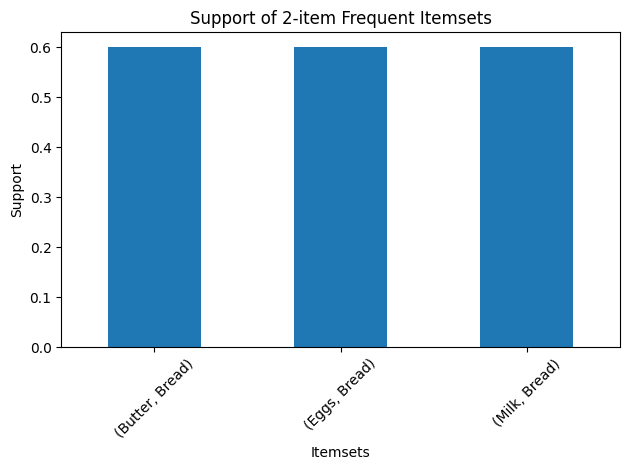

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Sample dataset: List of transactions
transactions = [
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter', 'Jam'],
    ['Milk', 'Bread', 'Eggs'],
    ['Milk', 'Butter', 'Eggs', 'Bread'],
    ['Bread', 'Eggs']
]

# Convert transactions into a DataFrame using TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

print("Dataset (Binary Encoding):\n", df)

# Apply Apriori algorithm to find frequent itemsets
min_support = 0.5
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
print("\nFrequent Itemsets:\n", frequent_itemsets)

# Generate association rules
min_confidence = 0.6
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence,num_itemsets=5)
print("\nAssociation Rules:\n", rules)

# Plot the support vs confidence for rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6, edgecolors='k')
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Plot heatmap of lift
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

lift_matrix = rules.pivot(index='antecedents', columns='consequents', values='lift').fillna(0)
plt.figure(figsize=(12, 8))
plt.title('Lift Heatmap')
plt.imshow(lift_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Lift')
plt.xticks(range(len(lift_matrix.columns)), lift_matrix.columns, rotation=90)
plt.yticks(range(len(lift_matrix.index)), lift_matrix.index)
plt.tight_layout()
plt.show()

# Plot bar chart for frequent itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] == 2]
plt.figure(figsize=(10, 6))
frequent_itemsets.plot(kind='bar', x='itemsets', y='support', legend=False)
plt.title('Support of 2-item Frequent Itemsets')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


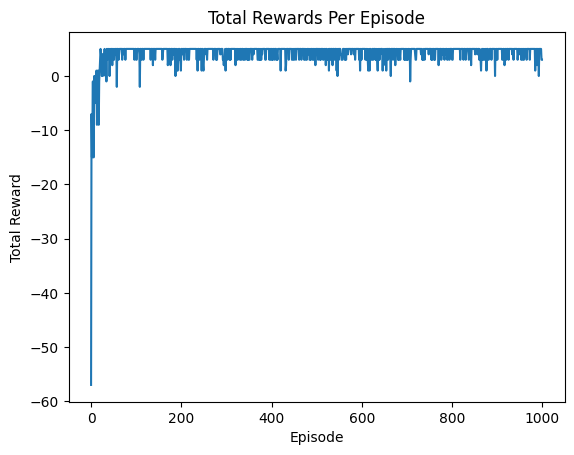

State (0, 0): [0.39577031 1.8098     0.46219187 1.14875971]
State (0, 1): [-1.30359075  3.09973549 -1.30718679 -1.10333933]
State (0, 2): [-0.79817453  4.31165302 -0.91429791 -0.69774057]
State (0, 3): [-0.3940399   0.5713984  -0.42657387 -0.3940399 ]
State (1, 0): [0.43936659 1.93909748 1.44639395 3.122     ]
State (1, 1): [1.45189087 4.05465847 1.70163307 4.58      ]
State (1, 2): [2.17752832 6.2        2.95245403 5.31854245]
State (1, 3): [-0.37743528  7.78928451 -0.21601    -0.1       ]
State (2, 0): [-0.77877059 -0.68388556 -0.53561477  4.24107224]
State (2, 1): [-0.06895482  0.62246245 -0.18654706  6.19904335]
State (2, 2): [3.97390057 8.         4.24478929 7.39363712]
State (2, 3): [0.89476542 9.99492471 0.10217137 0.        ]
State (3, 0): [-0.41760045 -0.3940399  -0.3940399   0.26616337]
State (3, 1): [ 0.63254466  0.29967766 -0.39810486  7.49013267]
State (3, 2): [ 5.39997122  7.47419831  4.47664401 10.        ]
State (3, 3): [0. 0. 0. 0.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
class Gridworld:
    def __init__(self, size=4):
        self.size = size
        self.state = (0, 0)  # Start position
        self.goal = (size - 1, size - 1)
        self.actions = ['up', 'down', 'left', 'right']
        self.action_space = len(self.actions)

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 'up':
            x = max(x - 1, 0)
        elif action == 'down':
            x = min(x + 1, self.size - 1)
        elif action == 'left':
            y = max(y - 1, 0)
        elif action == 'right':
            y = min(y + 1, self.size - 1)
        self.state = (x, y)

        if self.state == self.goal:
            return self.state, 10, True  # Goal reached, reward = 10
        else:
            return self.state, -1, False  # Penalty for every step

# Q-Learning Algorithm
def q_learning(env, episodes=500, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros((env.size, env.size, env.action_space))
    rewards = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action_idx = np.random.choice(env.action_space)  # Exploration
            else:
                action_idx = np.argmax(Q[state[0], state[1]])  # Exploitation

            action = env.actions[action_idx]
            next_state, reward, done = env.step(action)
            total_reward += reward

            # Update Q-value
            current_q = Q[state[0], state[1], action_idx]
            max_future_q = np.max(Q[next_state[0], next_state[1]])
            Q[state[0], state[1], action_idx] = current_q + alpha * (reward + gamma * max_future_q - current_q)

            state = next_state

        rewards.append(total_reward)

    return Q, rewards

# Initialize the environment
env = Gridworld(size=4)

# Train the agent
Q, rewards = q_learning(env, episodes=1000)

# Visualize the total rewards per episode
plt.plot(rewards)
plt.title("Total Rewards Per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

# Display the learned Q-values
for i in range(env.size):
    for j in range(env.size):
        print(f"State ({i}, {j}): {Q[i, j]}")
